In [8]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import numpy as np
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
#Imports timer
import tqdm
#To do Regex
import re
#To do sentiment analysis
from textblob import TextBlob
#To do bot analysis
import botometer

import matplotlib.pyplot as plt 
from matplotlib import ticker
import seaborn as sns

## Import data from CSV file to a DataFrame

In [4]:
data_df = pd.read_csv('1yT_ML.csv')

In [6]:
data_df

,Date_Hour,Close,Volume,%change,sum rob sent,sum nltk sent,total like volume,sum of like x robsent,sum of like x nltksent,ptrend
0,2021-01-01 06:00:00,0.004850,38.453436,-0.018596,-2.0,-2.0,186.0,-186.0,-186.0,0.0
1,2021-01-01 07:00:00,0.004860,19.742537,0.002062,2.0,-2.0,30.0,30.0,-30.0,1.0
2,2021-01-01 09:00:00,0.004815,65.834021,-0.012631,0.0,2.0,148.0,0.0,148.0,0.0
3,2021-01-01 12:00:00,0.004929,97.037278,0.007151,2.0,-2.0,28.0,28.0,-28.0,1.0
4,2021-01-01 13:00:00,0.004936,41.627356,0.001461,2.0,-2.0,66.0,66.0,-66.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8263,2021-12-31 19:00:00,0.166400,66.331054,-0.022327,5.0,1.0,210.0,210.0,158.0,0.0
8264,2021-12-31 20:00:00,0.167500,31.971667,0.006611,6.0,2.0,846.0,846.0,-476.0,1.0
8265,2021-12-31 21:00:00,0.170400,21.655869,0.017313,1.0,0.0,666.0,508.0,-440.0,1.0
8266,2021-12-31 22:00:00,0.170100,12.064902,-0.001761,3.0,6.0,1988.0,1148.0,1422.0,0.0


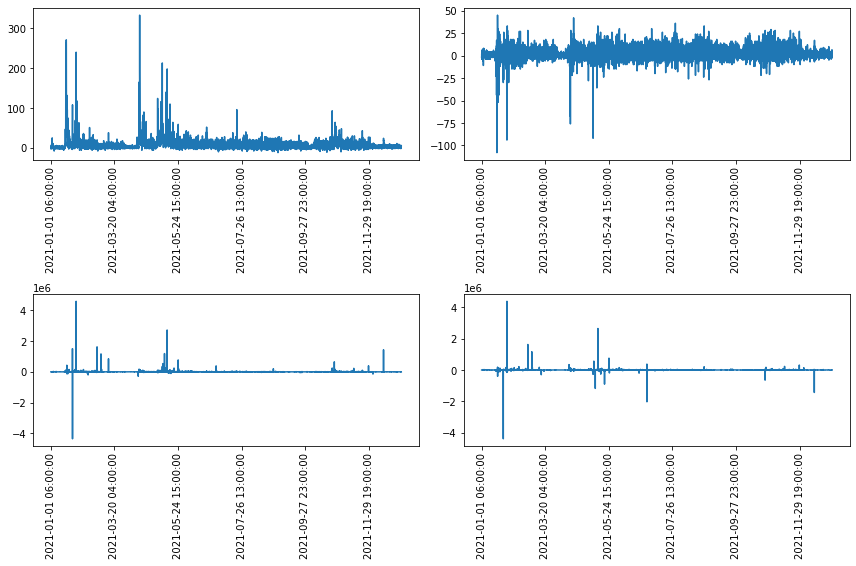

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

ax1[0].plot(data_df['Date_Hour'], data_df['sum rob sent'])
ax1[0].set_title('')
ax1[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax1[0].tick_params(axis='x',rotation=90)

ax1[1].plot(data_df['Date_Hour'], data_df['sum nltk sent'])
ax1[1].set_title('')
ax1[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax1[1].tick_params(axis='x',rotation=90)


ax2[0].plot(data_df['Date_Hour'], data_df['sum of like x robsent'])
ax2[0].set_title('')
ax2[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax2[0].tick_params(axis='x',rotation=90)

ax2[1].plot(data_df['Date_Hour'], data_df['sum of like x nltksent'])
ax2[1].set_title('')
ax2[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax2[1].tick_params(axis='x',rotation=90)


fig.tight_layout()
plt.show()